In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy
import iris
import matplotlib.pyplot as plt

import glob

In [2]:
%matplotlib inline

In [57]:
#/g/data/r87/dbi599/DRSv2/CMIP5/CCSM4/historicalGHG/yr/ocean/r1i1p1/thetao/latest/dedrifted/thetao_Oyr_CCSM4_historicalGHG_r1i1p1_??????-??????.nc
#/g/data/r87/dbi599/DRSv2/CMIP5/NorESM1-M/historical/mon/ocean/r1i1p1/thetao/latest/dedrifted/thetao_Omon_NorESM1-M_historical_r1i1p1_*.nc
#/g/data/ua6/DRSv3/CMIP5/NorESM1-M/historical/mon/ocean/r1i1p1/thetao/latest/thetao_Omon_NorESM1-M_historical_r1i1p1_*.nc

#/g/data/r87/dbi599/DRSv2/CMIP5/NorESM1-M/historicalMisc/mon/ocean/r1i1p1/thetao/latest/thetao_Omon_NorESM1-M_historicalMisc_r1i1p1_??????-??????.nc
#/g/data/r87/dbi599/DRSv2/CMIP5/NorESM1-M/historicalMisc/yr/ocean/r1i1p1/thetao/latest/dedrifted/thetao_Oyr_NorESM1-M_historicalMisc_r1i1p1_??????-??????.nc

infiles = glob.glob('/g/data/r87/dbi599/DRSv2/CMIP5/NorESM1-M/historicalMisc/yr/ocean/r1i1p1/thetao/latest/dedrifted/thetao_Oyr_NorESM1-M_historicalMisc_r1i1p1_??????-??????_fixed.nc')
infiles.sort()
print(len(infiles))

6


In [58]:
def min_max_bytime(infiles):
    """Print min and max for each timestep"""
    
    for filenum, infile in enumerate(infiles):
        print(filenum, infile)
        cube = iris.load_cube(infile)
    
        for index, time_slice in enumerate(cube.slices_over('time')):
            print('time: %i, max: %f, mean: %f, min: %f' %(index, time_slice.data.max(), time_slice.data.mean(), time_slice.data.min()))

In [59]:
min_max_bytime(infiles)

0 /g/data/r87/dbi599/DRSv2/CMIP5/NorESM1-M/historicalMisc/yr/ocean/r1i1p1/thetao/latest/dedrifted/thetao_Oyr_NorESM1-M_historicalMisc_r1i1p1_185401-185712_fixed.nc
time: 0, max: 302.379435, mean: 281.241639, min: 271.348195
time: 1, max: 302.545807, mean: 281.244832, min: 271.349345
time: 2, max: 302.639374, mean: 281.261332, min: 271.349355
time: 3, max: 302.945028, mean: 281.258882, min: 271.337413
1 /g/data/r87/dbi599/DRSv2/CMIP5/NorESM1-M/historicalMisc/yr/ocean/r1i1p1/thetao/latest/dedrifted/thetao_Oyr_NorESM1-M_historicalMisc_r1i1p1_189801-190112_fixed.nc
time: 0, max: 302.498138, mean: 281.231961, min: 271.020945
time: 1, max: 302.516713, mean: 281.253290, min: 270.999858
time: 2, max: 302.463470, mean: 281.241171, min: 270.997548
time: 3, max: 302.483236, mean: 281.233337, min: 270.949453
2 /g/data/r87/dbi599/DRSv2/CMIP5/NorESM1-M/historicalMisc/yr/ocean/r1i1p1/thetao/latest/dedrifted/thetao_Oyr_NorESM1-M_historicalMisc_r1i1p1_191801-192112_fixed.nc
time: 0, max: 302.361013, me

In [60]:
def min_max_bydepth(infile, tstep):
    """Print min and max for each timestep"""
    print(infile)
    cube = iris.load_cube(infile)
    for index, depth_slice in enumerate(cube[tstep, ::].slices_over('depth')):
        print('depth: %i, max: %f, min: %f' %(index, depth_slice.data.max(), depth_slice.data.min()))

In [61]:
min_max_bydepth(infiles[3], 3)

/g/data/r87/dbi599/DRSv2/CMIP5/NorESM1-M/historicalMisc/yr/ocean/r1i1p1/thetao/latest/dedrifted/thetao_Oyr_NorESM1-M_historicalMisc_r1i1p1_193001-193312_fixed.nc
depth: 0, max: 302.549011, min: 271.347392
depth: 1, max: 302.549011, min: 271.347392
depth: 2, max: 302.609497, min: 271.348551
depth: 3, max: 302.655253, min: 271.349589
depth: 4, max: 302.652974, min: 271.348022
depth: 5, max: 302.656321, min: 271.339884
depth: 6, max: 302.658620, min: 271.339284
depth: 7, max: 302.656494, min: 271.337646
depth: 8, max: 302.606181, min: 271.331451
depth: 9, max: 302.297272, min: 271.344920
depth: 10, max: 302.072703, min: 270.832672
depth: 11, max: 301.675598, min: 271.307556
depth: 12, max: 301.363129, min: 271.277985
depth: 13, max: 301.213114, min: 271.250366
depth: 14, max: 301.030294, min: 271.235372
depth: 15, max: 300.443573, min: 271.250071
depth: 16, max: 299.643483, min: 271.291321
depth: 17, max: 297.990662, min: 271.389496
depth: 18, max: 297.381561, min: 271.411204
depth: 19, m

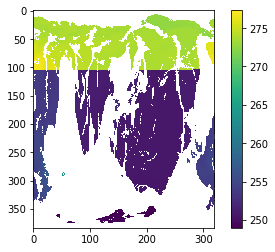

In [44]:
cube = iris.load_cube(infiles[26])
plt.imshow(cube.data[0, 56, ::])
cb = plt.colorbar()
plt.show()

In [38]:
cube.data[0, 0, 49, 12]

-65.60850016276044

In [19]:
cube.data[84, 38, ::].mask.sum()

111923

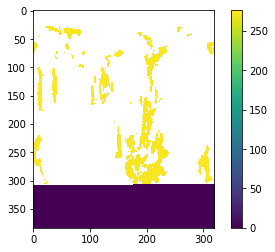

In [34]:
cube = iris.load_cube(infiles[1])
plt.imshow(cube.data[7, 58, ::])
cb = plt.colorbar()
plt.show()

In [35]:
cube.data[7, 58, ::].mask.sum()

87476

In [36]:
cube.data[8, 58, ::].mask.sum()

111923

In [37]:
cube.data[-1, 58, ::].mask.sum()

111923

In [38]:
cube.data[7, 58, ::] = numpy.ma.masked_where(cube.data[7, 58, ::] == 0, cube.data[7, 58, ::])

In [39]:
cube.data[7, 58, ::].mask.sum()

111941

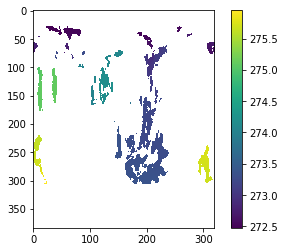

In [40]:
plt.imshow(cube.data[7, 58, ::])
cb = plt.colorbar()
plt.show()

In [41]:
cube.data[7, 58, ::].min()

272.4764